In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/train.csv')
test = pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/test.csv')
meta_x_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/x_feature_info.csv')
meta_y_features= pd.read_csv('C:/Users/Lee Dong woo/Desktop/LGAimers/meta/y_feature_info.csv')

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
import random
import os
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    np.random.seed(seed)
seed_everything(42)
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Input : y Feature


Y_13

In [3]:
df13_pass=train_y[(train_y['Y_13']>=-29.2)&(train_y['Y_13']<=-24)]
df13_fail=train_y[(train_y['Y_13']<-29.2)|(train_y['Y_13']>-24)]



Pass, Fail 구분. 이후 X_feature 들에 대해서 boxplot 비교

In [4]:
df13_pass.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            39597, 39598, 39599, 39600, 39601, 39602, 39603, 39604, 39605,
            39606],
           dtype='int64', length=39592)

In [5]:
x13_train_pass = train_x.loc[df13_pass.index,:]
x13_train_fail = train_x.loc[df13_fail.index,:]
x13_train_pass

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,66.465,103.320,63.67,1,102.025,67.845,30.30,112.60,275.52,0.0,...,1,1,62222.33,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


In [6]:
x13_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
144,67.485,103.320,59.77,1,103.155,67.845,28.12,101.33,183.32,0.0,...,1,1,14721.03,127.074246,129.403637,138.681802,127.734366,133.427456,131.745579,129.317654
1145,67.485,103.321,73.17,1,101.919,71.923,38.24,43.53,141.46,0.0,...,1,1,12402.63,130.678235,124.525860,142.549783,130.631086,124.253544,138.550160,121.441296
1248,67.485,103.320,74.97,1,101.900,73.963,31.69,123.18,205.12,0.0,...,1,1,17495.23,137.005261,132.316914,134.431055,137.648176,127.969158,134.421544,127.853367
4628,69.524,103.321,61.67,1,103.122,69.884,28.92,103.71,232.58,0.0,...,1,1,14088.63,130.492810,130.908993,136.395174,120.197065,120.599537,123.747197,122.546757
13923,68.504,103.321,77.77,1,101.975,71.923,29.37,103.07,277.42,0.0,...,1,1,13630.93,133.029797,136.224743,142.798021,126.979910,127.879742,140.804257,135.022701
15287,66.465,103.320,66.07,1,101.954,69.884,27.07,114.60,273.60,0.0,...,1,1,15658.43,125.745587,135.358456,142.937654,127.581740,128.934643,142.457150,129.221394
16665,66.465,103.320,62.17,1,102.014,66.825,30.60,112.30,272.03,0.0,...,1,1,17541.63,121.338971,136.260449,143.070665,125.349485,128.743114,135.827961,122.828602
20785,65.445,103.320,62.57,1,102.019,66.825,29.74,99.21,276.75,0.0,...,1,1,17604.23,131.546864,127.481320,140.635065,124.544302,127.570286,134.873593,129.913105
21587,64.425,103.320,64.87,1,101.993,68.864,28.71,113.55,347.26,0.0,...,1,1,10034.13,134.539395,128.343296,131.763094,132.421209,127.974865,139.693737,131.103680
24552,71.563,103.320,68.67,1,101.920,72.943,28.99,212.49,231.63,0.0,...,1,1,15138.93,130.296895,123.978794,129.658182,126.048521,133.803890,130.848126,121.912228


In [7]:
x13_train_pass['X_60']='Pass'
x13_train_fail['X_60']='Fail'
x13_train_fail

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
144,67.485,103.320,59.77,1,103.155,67.845,28.12,101.33,183.32,0.0,...,1,14721.03,127.074246,129.403637,138.681802,127.734366,133.427456,131.745579,129.317654,Fail
1145,67.485,103.321,73.17,1,101.919,71.923,38.24,43.53,141.46,0.0,...,1,12402.63,130.678235,124.525860,142.549783,130.631086,124.253544,138.550160,121.441296,Fail
1248,67.485,103.320,74.97,1,101.900,73.963,31.69,123.18,205.12,0.0,...,1,17495.23,137.005261,132.316914,134.431055,137.648176,127.969158,134.421544,127.853367,Fail
4628,69.524,103.321,61.67,1,103.122,69.884,28.92,103.71,232.58,0.0,...,1,14088.63,130.492810,130.908993,136.395174,120.197065,120.599537,123.747197,122.546757,Fail
13923,68.504,103.321,77.77,1,101.975,71.923,29.37,103.07,277.42,0.0,...,1,13630.93,133.029797,136.224743,142.798021,126.979910,127.879742,140.804257,135.022701,Fail
15287,66.465,103.320,66.07,1,101.954,69.884,27.07,114.60,273.60,0.0,...,1,15658.43,125.745587,135.358456,142.937654,127.581740,128.934643,142.457150,129.221394,Fail
16665,66.465,103.320,62.17,1,102.014,66.825,30.60,112.30,272.03,0.0,...,1,17541.63,121.338971,136.260449,143.070665,125.349485,128.743114,135.827961,122.828602,Fail
20785,65.445,103.320,62.57,1,102.019,66.825,29.74,99.21,276.75,0.0,...,1,17604.23,131.546864,127.481320,140.635065,124.544302,127.570286,134.873593,129.913105,Fail
21587,64.425,103.320,64.87,1,101.993,68.864,28.71,113.55,347.26,0.0,...,1,10034.13,134.539395,128.343296,131.763094,132.421209,127.974865,139.693737,131.103680,Fail
24552,71.563,103.320,68.67,1,101.920,72.943,28.99,212.49,231.63,0.0,...,1,15138.93,130.296895,123.978794,129.658182,126.048521,133.803890,130.848126,121.912228,Fail


In [8]:
x13_train = pd.concat([x13_train_pass,x13_train_fail],ignore_index=True)
x13_train

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_60
0,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,...,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,Pass
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,Pass
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,Pass
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,Pass
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39602,66.465,103.320,63.87,1,102.010,67.845,30.40,117.72,279.83,0.0,...,1,16420.73,133.381245,121.376873,132.547395,123.789312,126.411930,133.200078,124.561634,Fail
39603,69.524,103.320,63.77,1,103.141,69.884,30.59,119.89,182.37,0.0,...,1,11885.33,126.850156,124.453427,132.776155,114.718199,119.746044,137.896275,122.699856,Fail
39604,65.445,103.320,66.37,1,102.032,70.904,29.01,363.18,271.27,0.0,...,1,26999.23,131.005353,124.942623,134.739191,132.457708,128.200481,133.932126,133.834156,Fail
39605,71.563,103.320,64.37,1,103.152,71.923,30.32,101.71,290.46,0.0,...,1,16911.03,136.419087,137.174702,141.248628,129.738524,133.780857,138.693837,132.168018,Fail


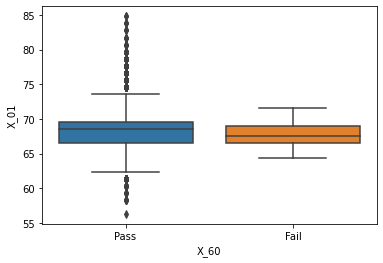

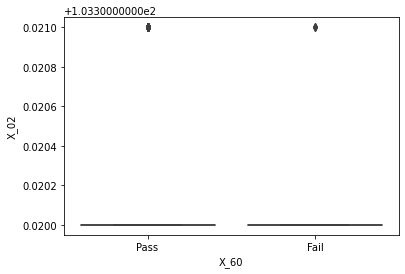

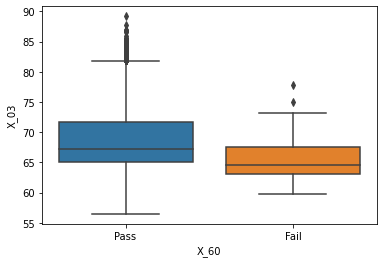

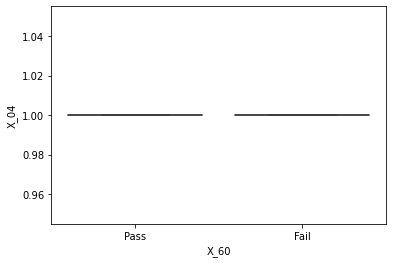

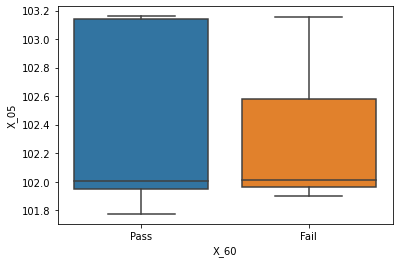

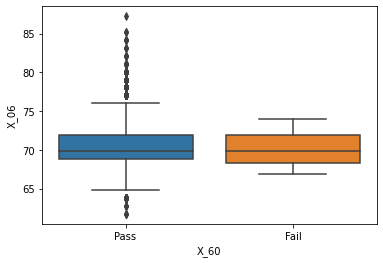

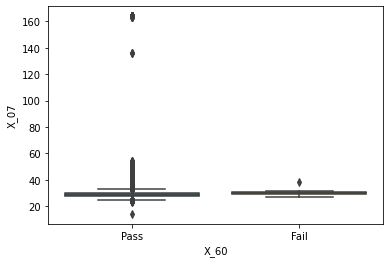

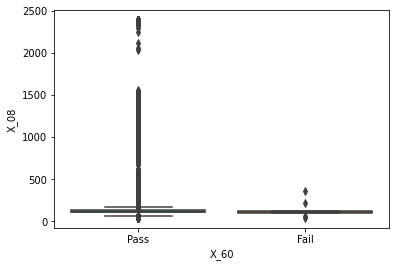

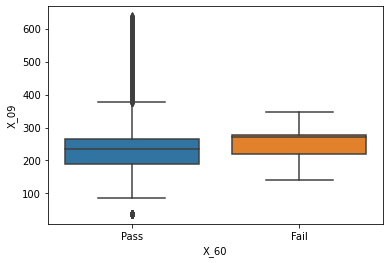

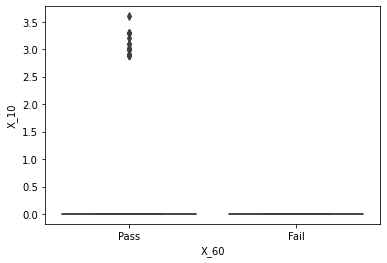

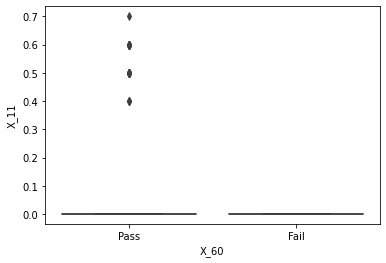

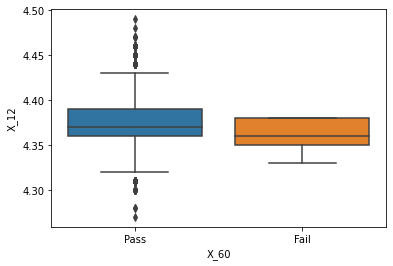

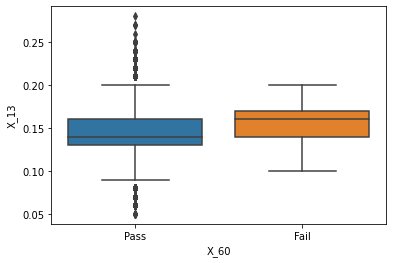

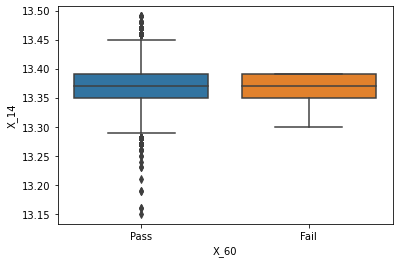

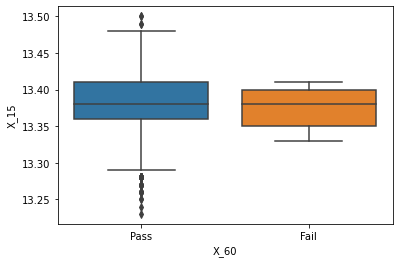

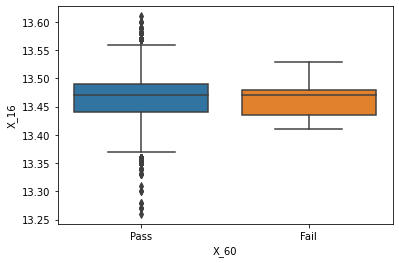

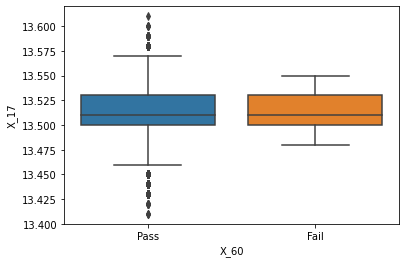

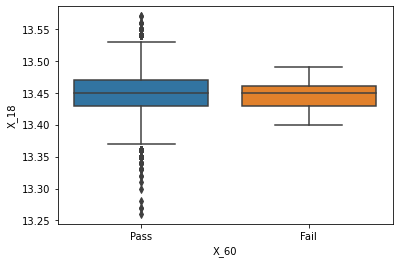

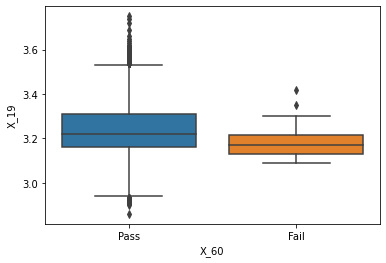

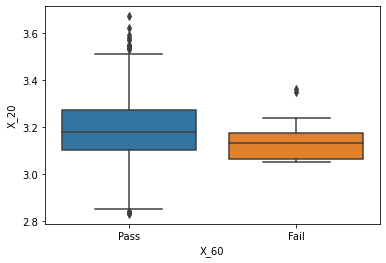

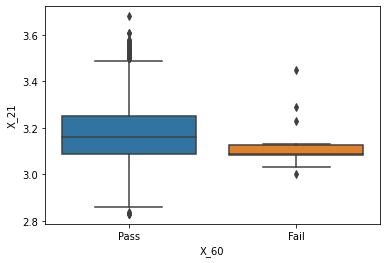

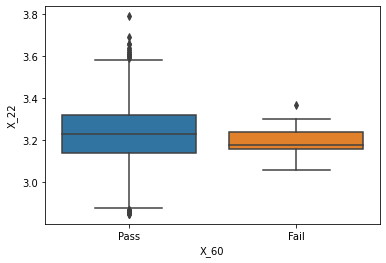

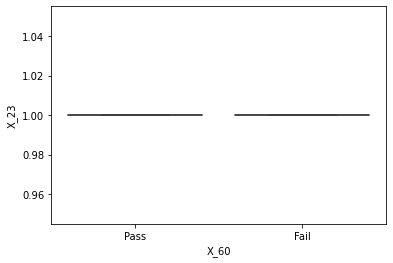

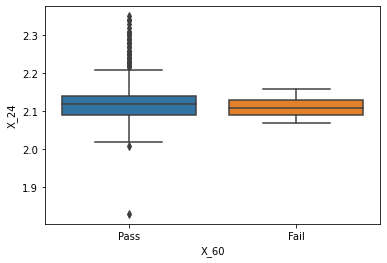

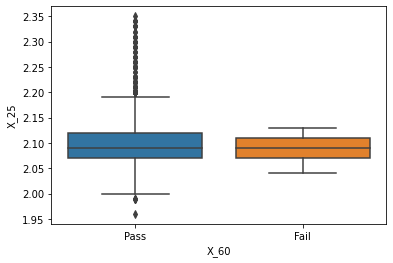

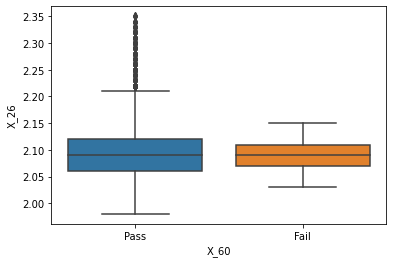

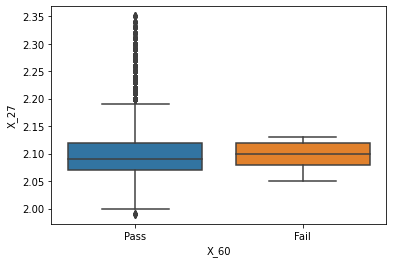

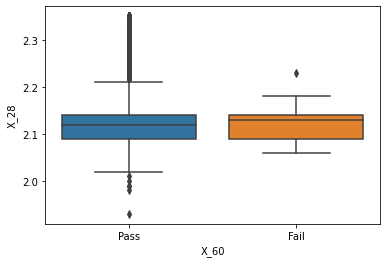

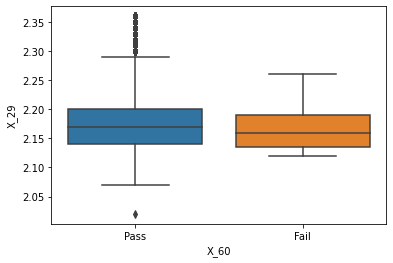

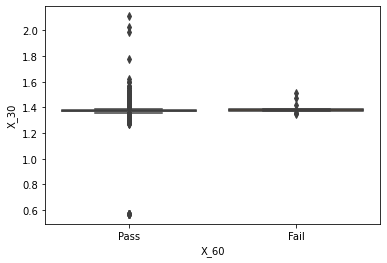

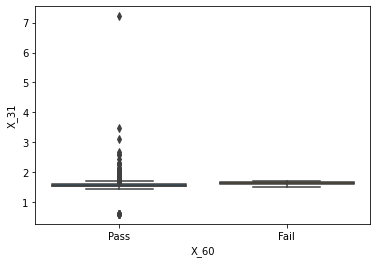

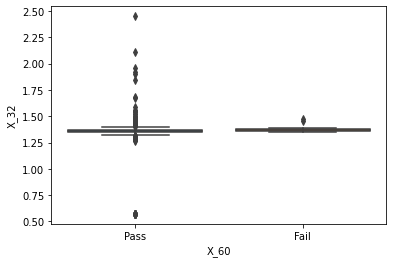

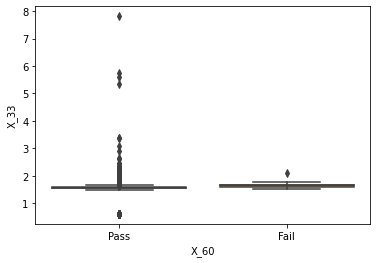

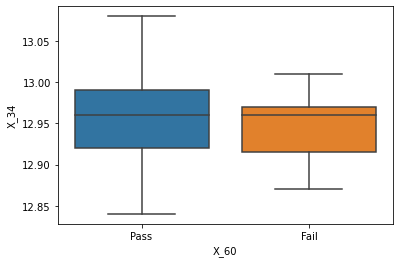

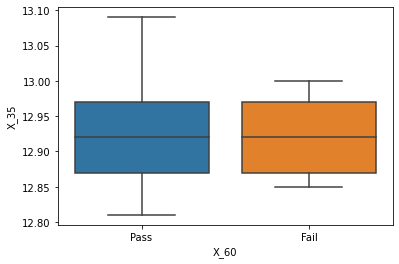

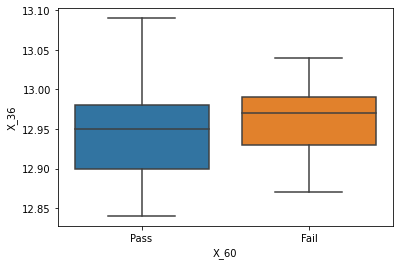

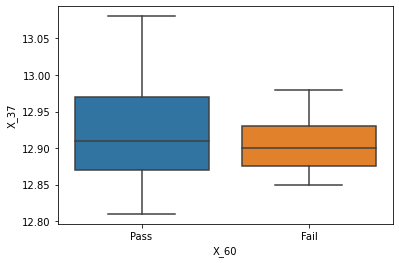

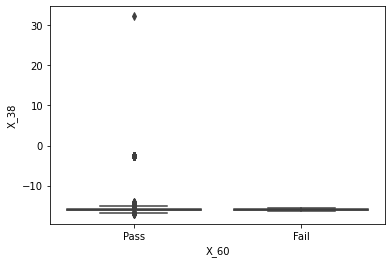

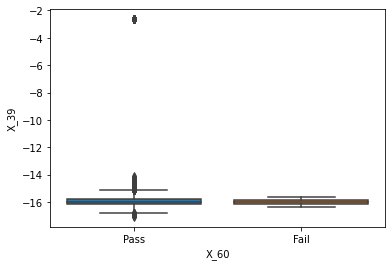

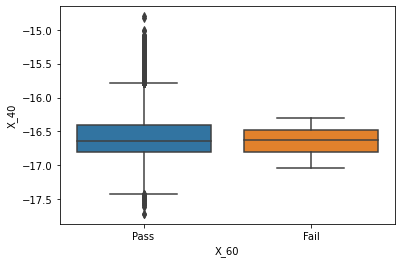

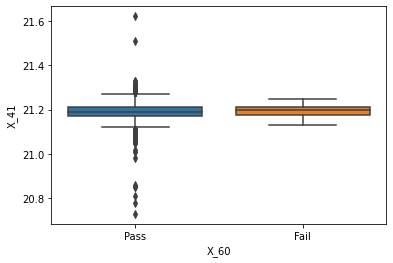

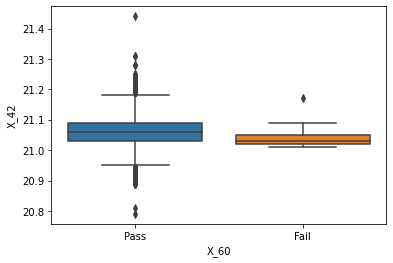

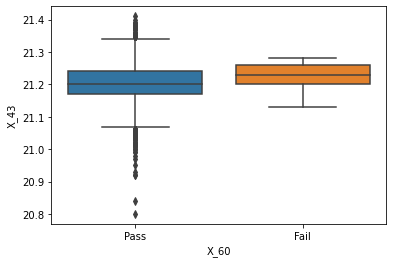

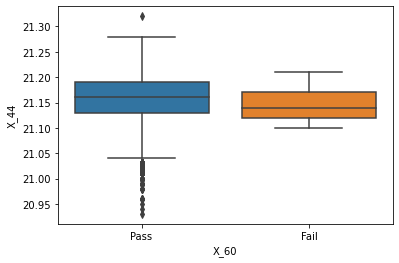

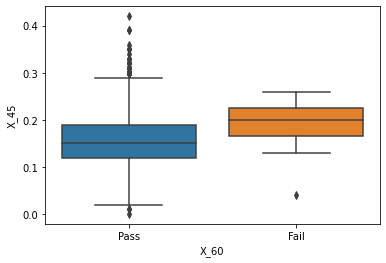

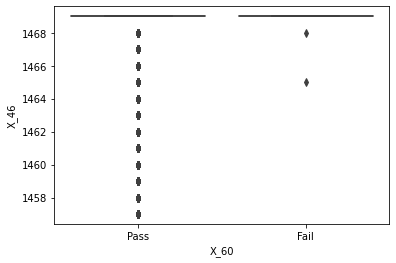

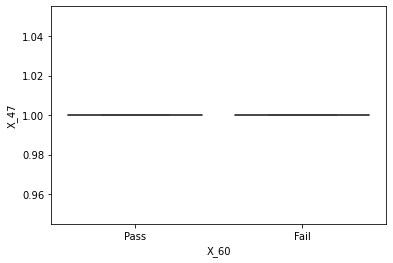

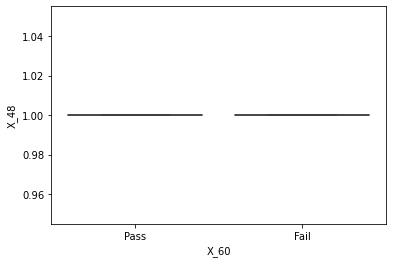

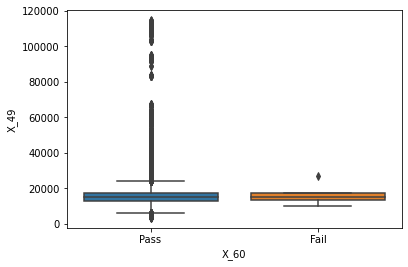

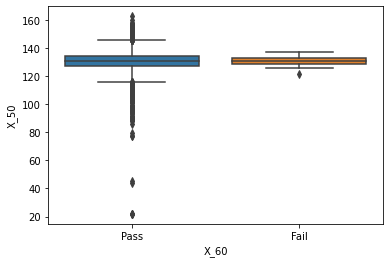

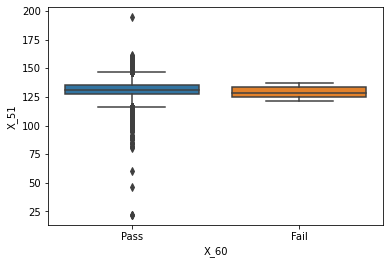

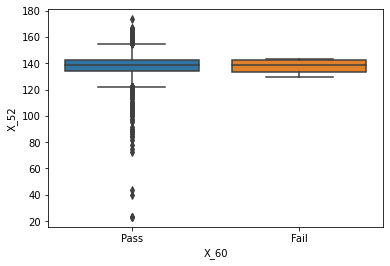

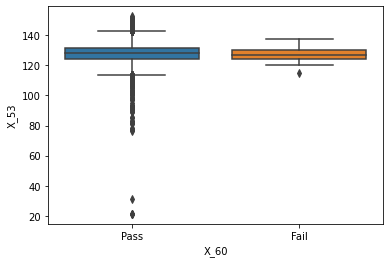

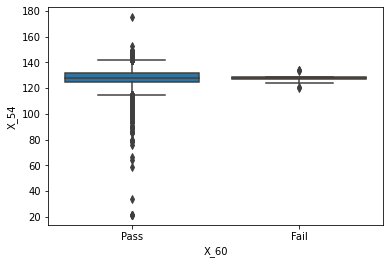

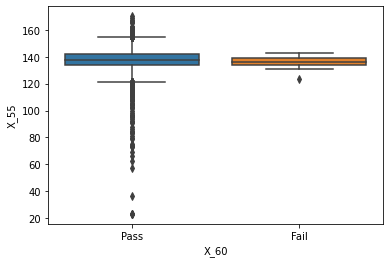

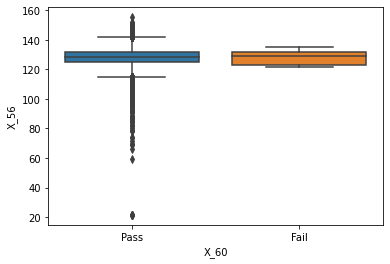

In [9]:
import seaborn as sns
for i in range(1,57):
    if i<10:
        sns.boxplot(x='X_60',y='X_{}'.format('0'+str(i)),data=x13_train)
        plt.show()
    else:
        sns.boxplot(x='X_60',y='X_{}'.format(i),data=x13_train)
        plt.show()

Y_14

In [ ]:
df14_pass=train_y[(train_y['Y_14']>=-29.2)&(train_y['Y_14']<=-24)]
df14_fail=train_y[(train_y['Y_14']<-29.2)|(train_y['Y_14']>-24)]


